(321, 500, 3)

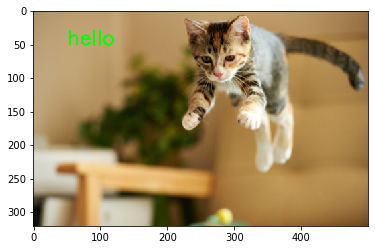

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/index.png")
image=cv2.cvtColor (image,cv2.COLOR_BGR2RGB)
cv2.putText(image,"hello",(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
plt.imshow(image)
image.shape
#for imread(): copy the complete path of the image, change into forward slash

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Screenshots/1.png",0)
img2=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Screenshots/screenshot2.png",0)
intersection = np.logical_and(img1, img2)
union = np.logical_or(img1, img2)
iou_score = np.sum(intersection) / np.sum(union)
print(iou_score)

#for imread(): copy the complete path of the image, change into forward slash

0.9904542824074074


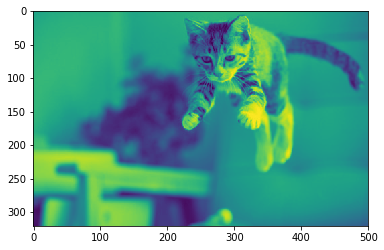

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
image=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/index.png")

#converting to HSV format
hsv_image=cv2.cvtColor (image,cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)

#converting to gray scale
gray_image=cv2.cvtColor (image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

#can only plot the 2nd graph. why?


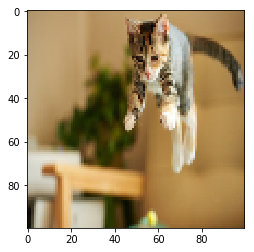

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
image=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/index.png")
image=cv2.cvtColor (image,cv2.COLOR_BGR2RGB)

#[interpolation=cv2.INTER_xxx] linear by default 
smaller_image=cv2.resize(image,(100,100),interpolation=cv2.INTER_LINEAR)
plt.imshow(smaller_image)

True

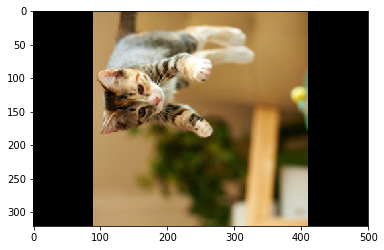

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
image=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/index.png")
image=cv2.cvtColor (image,cv2.COLOR_BGR2RGB)

rows,cols=image.shape[:2]
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center
M=cv2.getRotationMatrix2D ((cols/2,rows/2),90,1)
dst=cv2.warpAffine(image,M,(cols,rows))
plt.imshow(dst)

cv2.imwrite("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/rotation.jpg",dst)

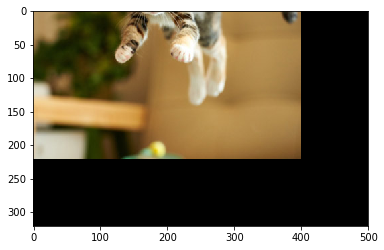

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
image=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/index.png")
image=cv2.cvtColor (image,cv2.COLOR_BGR2RGB)

#shifting the image 100 pixels in both dimentions
M=np.float32([[1,0,-100],[0,1,-100]])
dst=cv2.warpAffine(image,M,(cols,rows))
plt.imshow(dst)


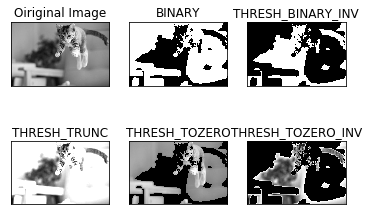

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
#here 0 means that the image is loaded in gray scale format
gray_image=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/index.png",0)

ret,thresh_binary=cv2.threshold (gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

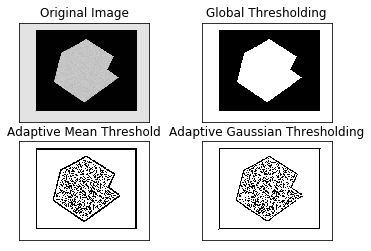

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
#here 0 means that the image is loaded in gray scale format
gray_image=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/bimodal.jpg",0)

ret,thresh_global=cv2.threshold (gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

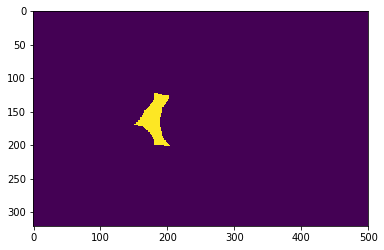

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
#here 0 means that the image is loaded in gray scale format
gray=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/index.png",0)

#apply thresholding
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#get a kernel
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
#extract the background from image
sure_bg = cv2.dilate(opening,kernel,iterations = 3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_bg)

ret,markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers==-1] = [255,0,0]

plt.imshow(sure_fg)
#only this image works...?
#biwise operations haven't tried

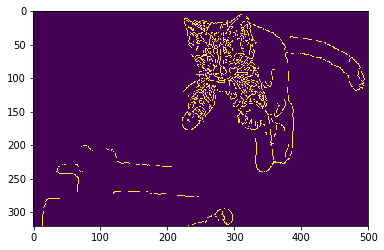

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
image=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/index.png")

#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges)

#what does the number 100 200 means?

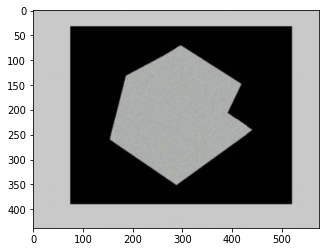

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
image=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/bimodal.jpg")
#using the averaging kernel for image smoothening 
averaging_kernel = np.ones((3,3),np.float32)/9 
filtered_image = cv2.filter2D(image,-1,kernel) 
plt.imshow(dst) 
#get a one dimensional Gaussian Kernel 
gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
#converting to two dimensional kernel using matrix multiplication 
gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
#you can also use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 
filtered_image = cv2.filter2D(image,-1,gaussian_kernel) 
plt.imshow(filtered_image)

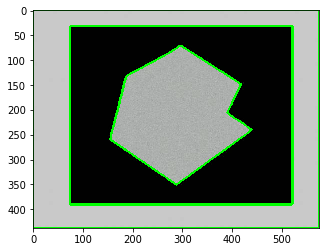

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
gray_image=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/bimodal.jpg",0)
ret,thresh = cv2.threshold(gray_image,127,255,0) 
#calculate the contours from binary image
im,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
with_contours = cv2.drawContours(image,contours,-1,(0,255,0),3) 
plt.imshow(with_contours)

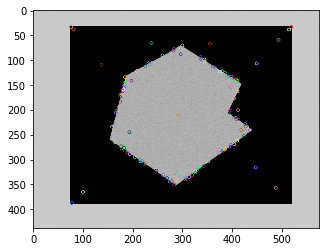

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
gray=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/bimodal.jpg",0)
#create sift object
sift  = cv2.xfeatures2d.SIFT_create()
#calculate keypoints and their orientation
keypoints,descriptors = sift.detectAndCompute(gray,None)
#plot keypoints on the image
with_keypoints = cv2.drawKeypoints(gray,keypoints,outImage=None)
#plot the image
plt.imshow(with_keypoints)

#cv2.drawKeypoints(<image>,<keypoints>,outImage=None)

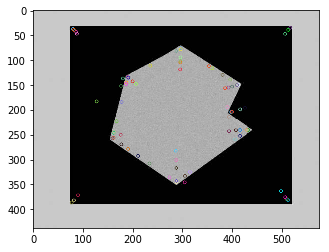

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
gray=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/bimodal.jpg",0)
#instantiate surf object
surf  = cv2.xfeatures2d.SURF_create(400)
#calculate keypoints and their orientation
keypoints,descriptors = surf.detectAndCompute(gray,None)

with_keypoints = cv2.drawKeypoints(gray,keypoints,outImage=None)

plt.imshow(with_keypoints)

#cv2.drawKeypoints(<image>,<keypoints>,outImage=None)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
image1=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/index.png",0)
image2=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Saved Pictures/rotation.jpg",0)

#finding out the keypoints and their descriptors
keypoints1,descriptors1 = cv2.detectAndCompute(image1,None)
keypoints2,descriptors2 = cv2.detectAndCompute(image2,None)

#matching the descriptors from both the images 
bf = cv2.BFMatcher()
matches = bf.knnMatch(ds1,ds2,k = 2)


#selecting only the good features
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

image3 = cv2.drawMatchesKnn(image1,kp1,image2,kp2,good,flags = 2)

AttributeError: 'module' object has no attribute 'detectAndCompute'

In [63]:
import cv2
cv2.__version__

'3.2.0'